# Algoritmo de Grover para el caso n=3 qubits ,  |w>=|q2q1q0>

Javier E. Salas Catonga

Junio 2020

In [68]:
#Valores de |w>=|q2q1q0>
q0=0
q1=1
q2=0

Visualizacion del Circuito Uw

El circuito Uw para |w>=|010> es...


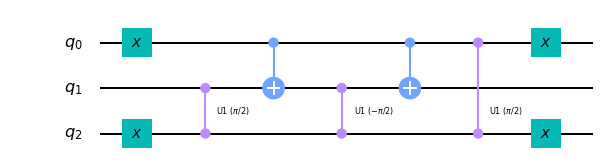

In [69]:
#Importamos las librerias necesarias
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram

import math
from math import pi
import matplotlib
%matplotlib inline

#Control de estados disponibles
estados=['000','100','110','011','001','101','010','111']

qubits=str(q2)+str(q1)+str(q0)

if qubits not in estados:
    sys.exit('Error...fuera de rango de los estados cuanticos disponibles, los parametros q0, q1, q2 solo pueden valer 0 o 1' )

#Definimos Uw
Uw=QuantumCircuit(3)

#Agregamos las compuertas necesarias para construir la compuerta Uw

if(qubits=='000'):
    Uw.x(0), Uw.x(1), Uw.x(2)
elif(qubits=='100'):
    Uw.x(0), Uw.x(1)
elif(qubits=='110'):
    Uw.x(0)
elif(qubits=='001'):
    Uw.x(1), Uw.x(2)
elif(qubits=='011'):
    Uw.x(2)
elif(qubits=='101'):
    Uw.x(1)
elif(qubits=='010'):
    Uw.x(0), Uw.x(2)

Uw.cu1(pi/2,1,2)
Uw.cx(0,1)
Uw.cu1(-pi/2,1,2)
Uw.cx(0,1)
Uw.cu1(pi/2,0,2)

if(qubits=='000'):
    Uw.x(0), Uw.x(1), Uw.x(2)
elif(qubits=='100'):
    Uw.x(0), Uw.x(1)
elif(qubits=='110'):
    Uw.x(0)
elif(qubits=='001'):
    Uw.x(1), Uw.x(2)
elif(qubits=='011'):
    Uw.x(2)
elif(qubits=='101'):
    Uw.x(1)
elif(qubits=='010'):
    Uw.x(0), Uw.x(2)


print('El circuito Uw para |w>='+'|'+qubits+'>'+' es...')
Uw.draw(output = 'mpl',filename='Uw'+qubits)

In [70]:
#Definimos la funcion que implementa el circuito de la compuerta Uw

if qubits not in estados:
    sys.exit('Error...no es posible contruir la funcion Uw, los parametros q0, q1, q2 solo pueden valer 0 o 1' )

def uw(circuit):
    
    if(qubits=='000'):
        circuit.x(0), circuit.x(1), circuit.x(2)
    elif(qubits=='100'):
        circuit.x(0), circuit.x(1)
    elif(qubits=='110'):
        circuit.x(0)
    elif(qubits=='001'):
        circuit.x(1), circuit.x(2)
    elif(qubits=='011'):
        circuit.x(2)
    elif(qubits=='101'):
        circuit.x(1)
    elif(qubits=='010'):
        circuit.x(0), circuit.x(2)

    circuit.cu1(pi/2,1,2)
    circuit.cx(0,1)
    circuit.cu1(-pi/2,1,2)
    circuit.cx(0,1)
    circuit.cu1(pi/2,0,2)

    if(qubits=='000'):
        circuit.x(0), circuit.x(1), circuit.x(2)
    elif(qubits=='100'):
        circuit.x(0), circuit.x(1)
    elif(qubits=='110'):
        circuit.x(0)
    elif(qubits=='001'):
        circuit.x(1), circuit.x(2)
    elif(qubits=='011'):
        circuit.x(2)
    elif(qubits=='101'):
        circuit.x(1)
    elif(qubits=='010'):
        circuit.x(0), circuit.x(2)

Visualizacion del circuito Us

El circuito Us es...


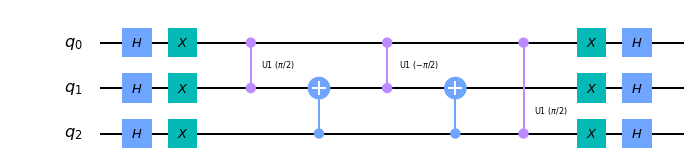

In [71]:
#Definimos la compuerta Us
n=3
Us = QuantumCircuit(n)

#Implementamos las compuertas Hadamard y las negaciones (Not)

for i in range(0,n):
    Us.h(i)
for i in range(0,n):
    Us.x(i)

#Construimos el circuito que le cambia el signo solo al estado |000>

Us.cu1(pi/2,1,0)
Us.cx(2,1)
Us.cu1(-pi/2,1,0)
Us.cx(2,1)
Us.cu1(pi/2,2,0)

#Implementamos las compuertas Hadamard y las negaciones (Not) nuevamente

for i in range(0,n):
    Us.x(i)
for i in range(0,n):
    Us.h(i)
    
    
#Visualizamos el circuito Us

print('El circuito Us es...')
Us.draw(output = 'mpl',filename='UsGate')

In [72]:
#Construimos la fucion que define el circuito de la compuerta Us

def us(circuit):
    
    for i in range(0,n):
        circuit.h(i)
    
    for i in range(0,n):
        circuit.x(i)
    
    circuit.cu1(pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(-pi/2,1,0)
    circuit.cx(2,1)
    circuit.cu1(pi/2,2,0)
    
    for i in range(0,n):
        circuit.x(i)
    
    for i in range(0,n):
        circuit.h(i)    

 Construimos el circuito para el algoritmo de Grover...

In [73]:
#Lo hacemos para tres qubits (n=3)

n=3
qc=QuantumCircuit(n,n)

for i in range(0,n):
    qc.h(i)

qc.barrier(range(0,n))

# 1ª iteración
uw(qc)
us(qc)
qc.barrier(range(0,n))

In [74]:
#  ----------------------------------- ---------2ª iteración---------------------------------------
#Solo hacemos dos iteraciones debido al orden sqrt(N), en este caso N=8 

uw(qc)
us(qc)
qc.barrier(range(0,n))

El algoritmo de Grover queda como...


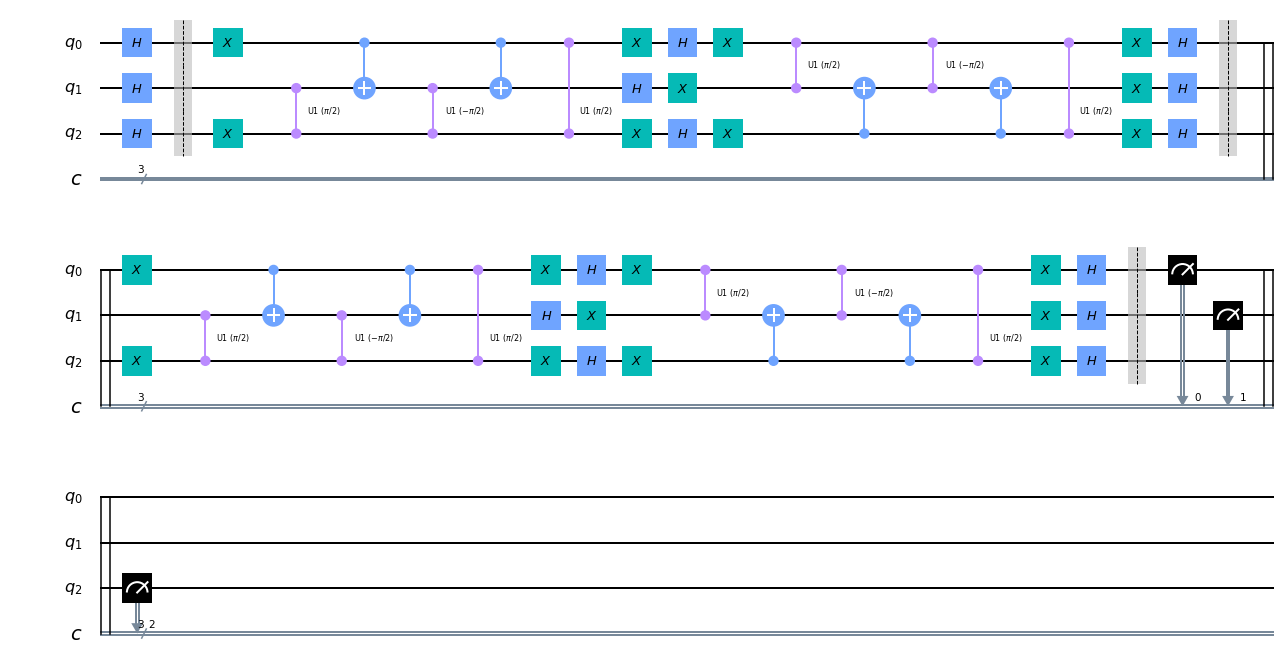

In [75]:
#Hacemos la medicion
qc.measure(range(0,n),range(0,n))

#Visualizamos el circuito
print('El algoritmo de Grover queda como...')
qc.draw(output = 'mpl', filename='Grover_w'+qubits)

Es estado encontrado es...


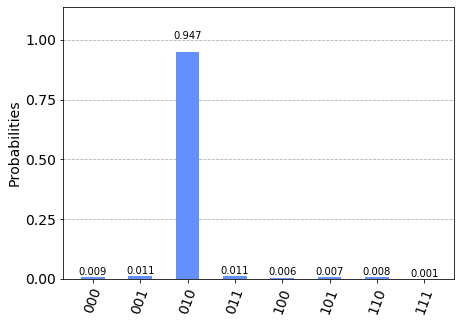

In [76]:
#Hacemos el histograma correspondiente utilizando el simulador qasm
qasm = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

#Imprimimos los resultados 
print('El estado encontrado es...')
fig=plot_histogram(counts)
fig.savefig('histogram_w'+qubits)
fig